<a href="https://colab.research.google.com/github/hmyrcmn/AtfStudiosProject/blob/main/HairnetDetectionYolov8_notTrueOutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!nvidia-smi

Thu Oct 26 10:42:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import os
HOME=os.getcwd()
HOME

'/content'

In [14]:
import zipfile

zip_file_path = "/content/Hairnet Detection 12-7.v1i.yolov8.zip"  # ZIP dosyasının yolunu ayarlayın
extraction_path = "/content/HairnetDetection"  # Çıkartılacak dizin yolunu ayarlayın

# ZIP dosyasını çıkartın
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [ ]:
!pip install ultralytics
# IPython'dan display modülünü içe aktarın
from IPython import display

# IPython çıktılarını temizleyin
display.clear_output()

# YOLOv8 modelini kontrol etmek için komutu çalıştırın
#!yolo mode=train

!yolo mode=checks



In [9]:
from ultralytics import YOLO
from IPython.display import display,Image

In [15]:
%cd {HOME}

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/HairnetDetection/valid/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-27_jpg.rf.d4c519149e50a001f01583d102a045bc.jpg"


/content
Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/HairnetDetection/valid/images/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-27_jpg.rf.d4c519149e50a001f01583d102a045bc.jpg: 640x640 1 person, 1 mouse, 8.6ms
Speed: 5.7ms preprocess, 8.6ms inference, 17.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


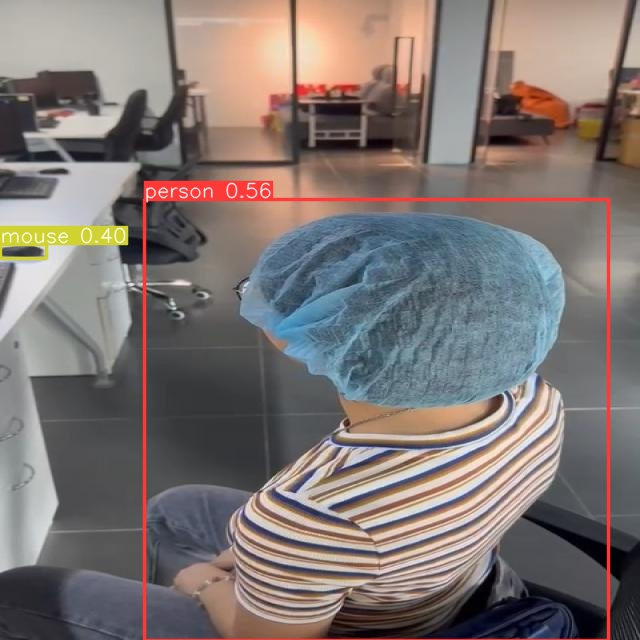

In [17]:
%cd {HOME}
Image(filename="/content/runs/detect/predict/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-27_jpg.rf.d4c519149e50a001f01583d102a045bc.jpg" ,height=600)

In [22]:
# Names and creation of files prepared for YoloV8(YoloV8 için hazırlanan dosyaların isimleri ve oluşturulmesı)
if os.path.isfile("/content/data/"):
    print("Dosya mevcut! (There is folder!)")
else:
    os.mkdir("/content/data/")
    os.mkdir('/content/data/train')
    os.mkdir('/content/data/val')
    os.mkdir('/content/data/test')
    os.mkdir('/content/data/train/images')
    os.mkdir('/content/data/train/labels')
    os.mkdir('/content/data/test/images')
    os.mkdir('/content/data/test/labels')
    os.mkdir('/content/data/val/images')
    os.mkdir('/content/data/val/labels')

In [24]:
!yolo task=detect mode=train model=/content/yolov8n.pt data=/content/HairnetDetection/data.yaml epochs=100 imgsz=640


Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/HairnetDetection/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscrip

In [28]:
!yolo task=detect mode=predict model=/content/yolov8s.pt conf=0.25 source=/content/hairnetİnput.mp4


Ultralytics YOLOv8.0.201 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

video 1/1 (1/310) /content/hairnetİnput.mp4: 384x640 2 persons, 1 traffic light, 1 bottle, 1 laptop, 1 cell phone, 144.0ms
video 1/1 (2/310) /content/hairnetİnput.mp4: 384x640 3 persons, 1 traffic light, 3 bottles, 1 laptop, 1 cell phone, 11.4ms
video 1/1 (3/310) /content/hairnetİnput.mp4: 384x640 3 persons, 1 traffic light, 1 bottle, 1 laptop, 1 cell phone, 11.2ms
video 1/1 (4/310) /content/hairnetİnput.mp4: 384x640 3 persons, 1 bottle, 1 laptop, 1 cell phone, 11.1ms
video 1/1 (5/310) /content/hairnetİnput.mp4: 384x640 3 persons, 2 bottles, 1 laptop, 1 cell phone, 11.1ms
video 1/1 (6/310) /content/hairnetİnput.mp4: 384x640 3 persons, 2 bottles, 1 laptop, 1 cell phone, 11.1ms
video 1/1 (7/310) /content/hairnetİnput.mp4: 384x640 3 persons, 1 bottle, 1 laptop, 1 cell phone, 11.1ms
video 1/1 (8/310) /content/hairnetİnpu

In [35]:
from IPython.display import Video

video_path = "/content/runs/detect/predict2/hairnetİnput.avi"
Video(video_path)

In [37]:
# Gerekli kütüphaneyi yükleyin
!apt-get install ffmpeg

# AVI dosyasını MP4 formatına dönüştürün
!ffmpeg -i /content/runs/detect/predict2/hairnetİnput.avi output.mp4


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq -

In [38]:
from google.colab import files

files.download('output.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>